In [1]:
###### Importing of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from math import sqrt

In [2]:
##### Getting the data ---
def read_data():
    data = pd.read_csv("C:/Data Science/Nov 2023/5 Nov 2023/KNN Assignment/bangalore house price prediction OHE-data.csv")
    return data


In [3]:
##### Calling the read Data Function
df = read_data()
print(df.head(2))
print(df.info())
print(df.shape)

   bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0   3.0      2.0  150.0          1672.0    3     8971.291866   
1   3.0      3.0  149.0          1750.0    3     8514.285714   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0                           1  ...   

   location_Kalena Agrahara  location_Horamavu Agara  location_Vidyaranyapura  \
0                         0                        0                        0   
1                         0                        0                        0   

   location_BTM 2nd Stage  location_Hebbal Kempapura  location_Hosur Road  \
0                       0                          0                    0   
1                       0                      

In [4]:
df.drop(['location_Whitefield', 'location_Sarjapur  Road',
       'location_Electronic City', 'location_Marathahalli',
       'location_Raja Rajeshwari Nagar', 'location_Haralur Road',
       'location_Hennur Road', 'location_Bannerghatta Road',
       'location_Uttarahalli', 'location_Thanisandra',
       'location_Electronic City Phase II', 'location_Hebbal',
       'location_7th Phase JP Nagar', 'location_Yelahanka',
       'location_Kanakpura Road', 'location_KR Puram', 'location_Sarjapur',
       'location_Rajaji Nagar', 'location_Kasavanhalli', 'location_Bellandur',
       'location_Begur Road', 'location_Banashankari', 'location_Kothanur',
       'location_Hormavu', 'location_Harlur', 'location_Akshaya Nagar',
       'location_Jakkur', 'location_Electronics City Phase 1',
       'location_Varthur', 'location_Chandapura', 'location_HSR Layout',
       'location_Hennur', 'location_Ramamurthy Nagar',
       'location_Ramagondanahalli', 'location_Kaggadasapura',
       'location_Kundalahalli', 'location_Koramangala', 'location_Hulimavu',
       'location_Budigere', 'location_Hoodi', 'location_Malleshwaram',
       'location_Hegde Nagar', 'location_8th Phase JP Nagar',
       'location_Gottigere', 'location_JP Nagar', 'location_Yeshwanthpur',
       'location_Channasandra', 'location_Bisuvanahalli',
       'location_Vittasandra', 'location_Indira Nagar', 'location_Vijayanagar',
       'location_Kengeri', 'location_Brookefield', 'location_Sahakara Nagar',
       'location_Hosa Road', 'location_Old Airport Road',
       'location_Bommasandra', 'location_Balagere',
       'location_Green Glen Layout', 'location_Old Madras Road',
       'location_Rachenahalli', 'location_Panathur', 'location_Kudlu Gate',
       'location_Thigalarapalya', 'location_Ambedkar Nagar', 'location_Jigani',
       'location_Yelahanka New Town', 'location_Talaghattapura',
       'location_Mysore Road', 'location_Kadugodi', 'location_Frazer Town',
       'location_Dodda Nekkundi', 'location_Devanahalli',
       'location_Kanakapura', 'location_Attibele', 'location_Anekal',
       'location_Lakshminarayana Pura', 'location_Nagarbhavi',
       'location_Ananth Nagar', 'location_5th Phase JP Nagar',
       'location_TC Palaya', 'location_CV Raman Nagar',
       'location_Kengeri Satellite Town', 'location_Kudlu',
       'location_Jalahalli', 'location_Subramanyapura', 'location_Bhoganhalli',
       'location_Doddathoguru'],axis = 1,inplace = True)

In [5]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object')

In [6]:
#### Preprocessing and Feature Enginneering
df1 = df.copy()
print(df1.head(2))

   bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0   3.0      2.0  150.0          1672.0    3     8971.291866   
1   3.0      3.0  149.0          1750.0    3     8514.285714   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   

   area_typePlot  Area  availability_Ready To Move  location_Kalena Agrahara  \
0                    0                           1                         0   
1                    0                           1                         0   

   location_Horamavu Agara  location_Vidyaranyapura  location_BTM 2nd Stage  \
0                        0                        0                       0   
1                        0                        0                       0   

   location_Hebbal Kempapura  location_Hosur Road  \
0                          0                    0   
1                          0          

In [7]:
#### Preprocessing and Feature Enginneering
df1 = df.copy()
print(df1.head(0))

Empty DataFrame
Columns: [bath, balcony, price, total_sqft_int, bhk, price_per_sqft, area_typeSuper built-up  Area, area_typeBuilt-up  Area, area_typePlot  Area, availability_Ready To Move, location_Kalena Agrahara, location_Horamavu Agara, location_Vidyaranyapura, location_BTM 2nd Stage, location_Hebbal Kempapura, location_Hosur Road, location_Horamavu Banaswadi, location_Domlur, location_Mahadevpura, location_Tumkur Road]
Index: []


In [8]:
#### Exploratory Data Analysis
df1["availability_Ready To Move"].value_counts()

1    5644
0    1476
Name: availability_Ready To Move, dtype: int64

In [72]:
df1["bath"].value_counts()

2.0    4312
3.0    1683
1.0     484
4.0     437
5.0     148
6.0      30
7.0      14
8.0       8
9.0       4
Name: bath, dtype: int64

In [73]:
df1["balcony"].value_counts()

1.000000    2833
2.000000    2818
3.000000     803
0.000000     464
1.584376     202
Name: balcony, dtype: int64

In [74]:
df1["price"].value_counts()

75.00    192
60.00    164
55.00    164
65.00    153
45.00    137
        ... 
67.65      1
97.83      1
89.90      1
79.90      1
84.83      1
Name: price, Length: 1285, dtype: int64

In [75]:
df1["total_sqft_int"].value_counts()

1200.0    291
1100.0    141
1000.0     91
1050.0     82
1500.0     78
         ... 
1916.0      1
1548.0      1
5667.5      1
3235.0      1
666.0       1
Name: total_sqft_int, Length: 1463, dtype: int64

In [76]:
df1["bhk"].value_counts()

2    3710
3    2420
1     441
4     420
5      69
6      33
7      12
8      11
9       4
Name: bhk, dtype: int64

In [77]:
df1["price_per_sqft"].value_counts()

5000.000000    89
4000.000000    60
6666.666667    45
6250.000000    36
6000.000000    32
               ..
6264.323911     1
5500.000000     1
5590.778098     1
5404.972376     1
4765.730337     1
Name: price_per_sqft, Length: 4661, dtype: int64

In [78]:
df1["area_typeSuper built-up  Area"].value_counts()

1    5345
0    1775
Name: area_typeSuper built-up  Area, dtype: int64

<Axes: xlabel='price_per_sqft', ylabel='total_sqft_int'>

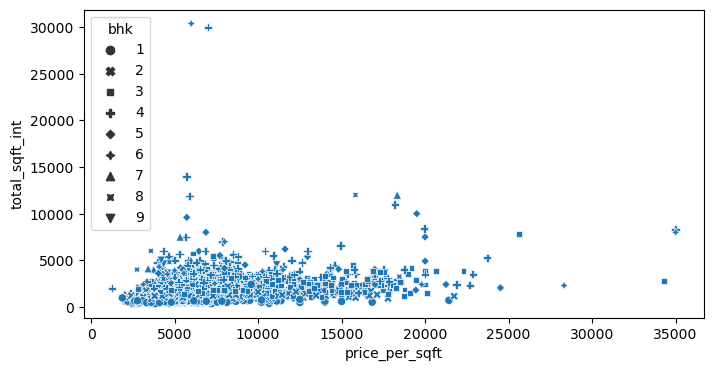

In [9]:
plt.figure(figsize= (8,4))
sns.scatterplot(x = 'price_per_sqft',y = 'total_sqft_int', data = df1 ,style = 'bhk')

<Figure size 1000x400 with 0 Axes>

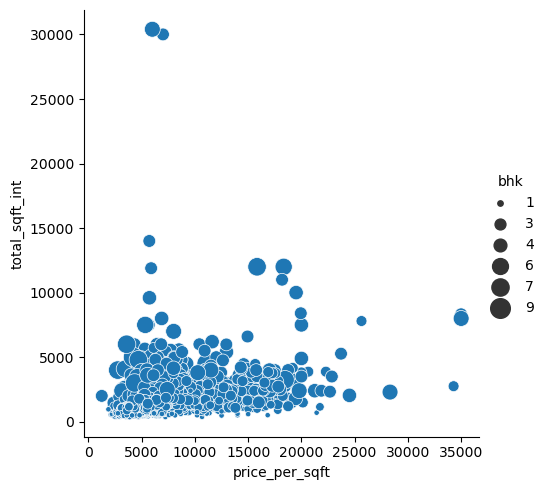

In [10]:
plt.figure(figsize= (10,4))
sns.relplot(x = 'price_per_sqft',y = 'total_sqft_int', data = df1 ,size = 'bhk',sizes = (15,200))

<Figure size 1000x400 with 0 Axes>

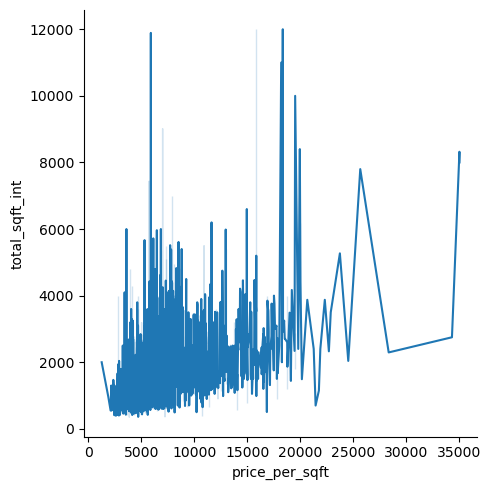

In [11]:
plt.figure(figsize= (10,4))
sns.relplot(x = 'price_per_sqft',y = 'total_sqft_int', data = df1 ,kind = "line")

<Axes: xlabel='bhk', ylabel='area_typeSuper built-up  Area'>

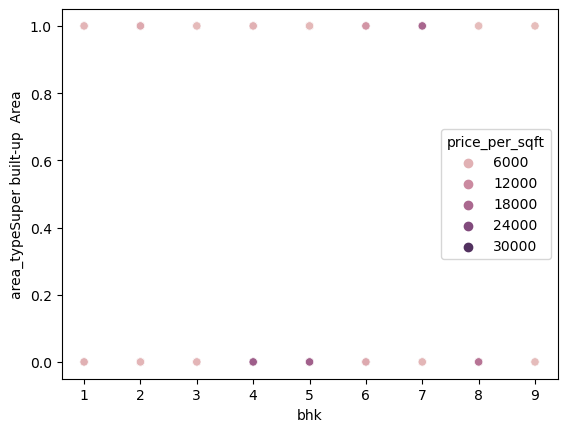

In [12]:
sns.scatterplot(x = 'bhk',y = 'area_typeSuper built-up  Area',hue = 'price_per_sqft',data = df1)

In [13]:
df1.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object')

In [14]:
y = df1['area_typeSuper built-up  Area']
X = df1[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [17]:
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [18]:
sqrt(df1.shape[0])

84.38009243891595

In [19]:
clf = KNeighborsClassifier(n_neighbors=83)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=83)

In [20]:
pred = clf.predict(X_test)
print(pred)

[1 1 1 ... 1 1 1]


In [21]:
print(y_test)

2165    1
1023    0
504     1
5782    1
6011    1
       ..
1669    1
1403    1
3173    1
1860    1
6342    1
Name: area_typeSuper built-up  Area, Length: 1424, dtype: int64


In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
print("The Accurancy Score is :",round(accuracy_score(y_test,pred),2))

The Accurancy Score is : 0.77


<Axes: >

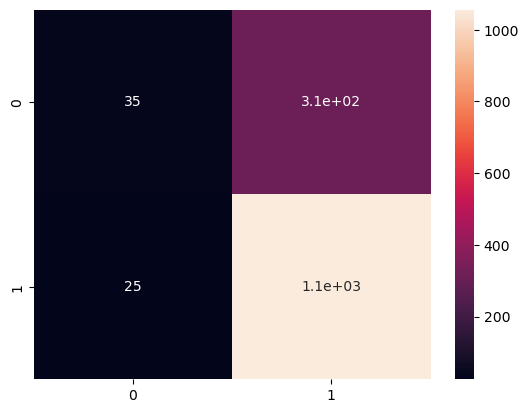

In [24]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [25]:
df1.shape

(7120, 20)

In [26]:
#### Error Method // Also called as Elbow Method

In [27]:
error = []
for i in range(1,85):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test,predict_i))

In [28]:
print(error)

[0.3047752808988764, 0.3686797752808989, 0.2528089887640449, 0.2935393258426966, 0.2478932584269663, 0.2612359550561798, 0.2373595505617978, 0.2528089887640449, 0.238061797752809, 0.2528089887640449, 0.2359550561797753, 0.2408707865168539, 0.2331460674157303, 0.2359550561797753, 0.2373595505617978, 0.2331460674157303, 0.2303370786516854, 0.2331460674157303, 0.2345505617977528, 0.2331460674157303, 0.2310393258426966, 0.2289325842696629, 0.223314606741573, 0.2254213483146067, 0.2303370786516854, 0.2289325842696629, 0.2303370786516854, 0.2303370786516854, 0.2296348314606742, 0.2296348314606742, 0.2254213483146067, 0.226123595505618, 0.2282303370786517, 0.2310393258426966, 0.2282303370786517, 0.2289325842696629, 0.2296348314606742, 0.2289325842696629, 0.2268258426966292, 0.2275280898876404, 0.2282303370786517, 0.2310393258426966, 0.2296348314606742, 0.2296348314606742, 0.2275280898876404, 0.2275280898876404, 0.2296348314606742, 0.2268258426966292, 0.2268258426966292, 0.2275280898876404, 0.

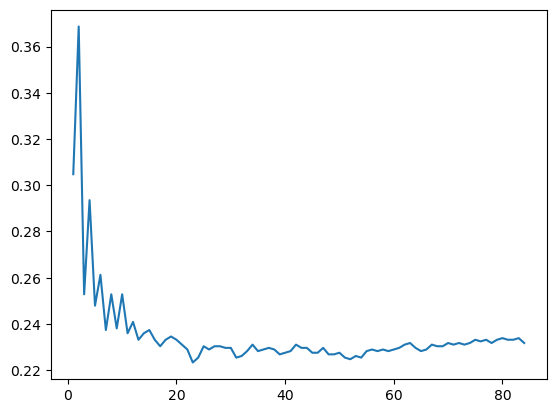

In [29]:
plt.plot(range(1,85),error)

In [30]:
y = df1['area_typeBuilt-up  Area']
X = df1[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft']]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [32]:
clf = KNeighborsClassifier(n_neighbors=87)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=87)

In [33]:
pred = clf.predict(X_test)
print(pred)

[0 0 0 ... 0 0 0]


In [34]:
print(y_test)

2165    0
1023    1
504     0
5782    0
6011    0
       ..
1669    0
1403    0
3173    0
1860    0
6342    0
Name: area_typeBuilt-up  Area, Length: 1424, dtype: int64


In [35]:
print("The Accurancy Score is :",round(accuracy_score(y_test,pred),2))

The Accurancy Score is : 0.82


<Axes: >

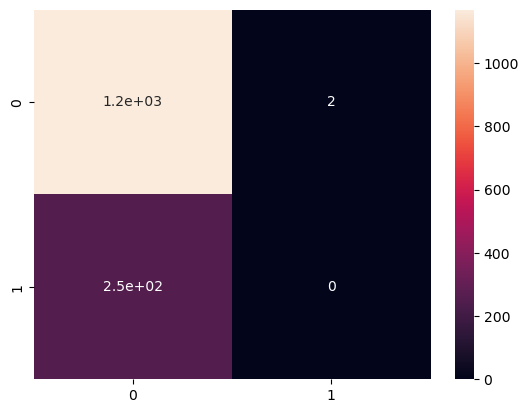

In [36]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [37]:
##### Error method// Also called as Elbow Method
error = []
for i in range (1,85):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test,predict_i))

In [38]:
print(error)

[0.2731741573033708, 0.1917134831460674, 0.2106741573033708, 0.1846910112359551, 0.1945224719101124, 0.1776685393258427, 0.1825842696629213, 0.1776685393258427, 0.1804775280898876, 0.1769662921348315, 0.1804775280898876, 0.175561797752809, 0.1748595505617978, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.1741573033707865, 0.1797752808988764, 0.1762640449438202, 0.1762640449438202, 0.1762640449438202, 0.1769662921348315, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.1769662921348315, 0.1769662921348315, 0.1762640449438202, 0.1762640449438202, 0.1769662921348315, 0.175561797752809, 0.175561797752809, 0.175561797752809, 0.1762640449438202, 0.1748595505617978, 0.1748595505617978, 0.1748595505617978, 0.175561797752809, 0.175561797752809, 0.1748595505617978, 0.1748595505617978, 0.1741573033707865, 

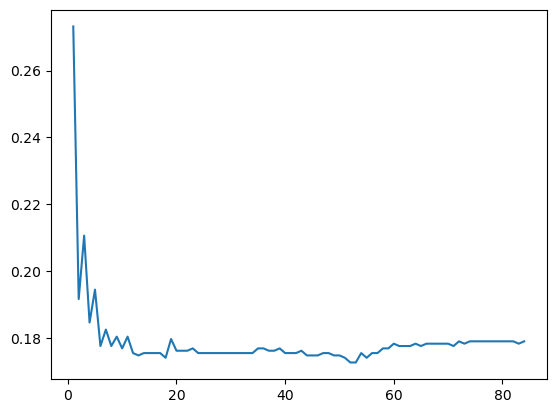

In [39]:
plt.plot(range(1,85),error)

In [40]:
df1.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object')

In [41]:
y = df1['area_typePlot  Area']
X = df1[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft']]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [44]:
X_train.shape,X_test.shape

((5696, 6), (1424, 6))

In [45]:
from math import sqrt

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
clf = KNeighborsClassifier(n_neighbors=87)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=87)

In [48]:
pred = clf.predict(X_test)
print(pred)

[0 0 0 ... 0 0 0]


In [49]:
print(y_test)

2165    0
1023    0
504     0
5782    0
6011    0
       ..
1669    0
1403    0
3173    0
1860    0
6342    0
Name: area_typePlot  Area, Length: 1424, dtype: int64


In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [51]:
print("The Accurancy Score is :",round(accuracy_score(y_test,pred),2))

The Accurancy Score is : 0.94


<Axes: >

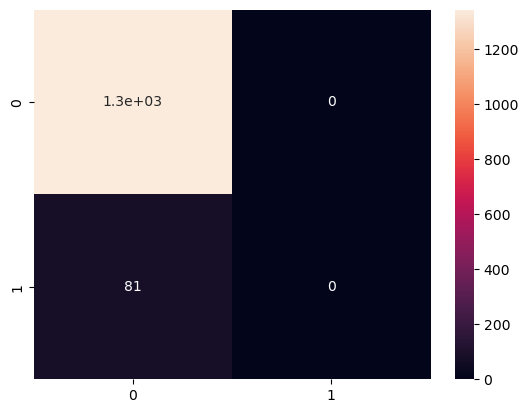

In [52]:
 sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [53]:
#### Error Method // Also called as Elbow Method
error = []
for i in range (1,31):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test,predict_i))

In [54]:
print(error)

[0.0730337078651685, 0.053370786516853896, 0.0603932584269663, 0.0568820224719101, 0.0589887640449438, 0.0561797752808989, 0.057584269662921295, 0.057584269662921295, 0.0603932584269663, 0.057584269662921295, 0.0589887640449438, 0.0561797752808989, 0.0568820224719101, 0.0561797752808989, 0.057584269662921295, 0.0582865168539326, 0.0589887640449438, 0.0589887640449438, 0.0603932584269663, 0.0589887640449438, 0.0603932584269663, 0.0610955056179775, 0.0610955056179775, 0.0603932584269663, 0.0610955056179775, 0.0582865168539326, 0.0589887640449438, 0.0589887640449438, 0.0589887640449438, 0.0582865168539326]


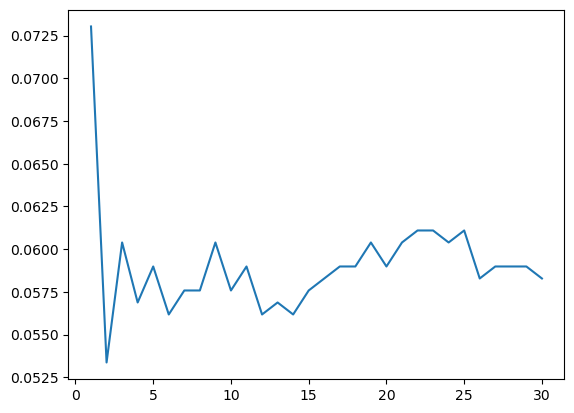

In [55]:
plt.plot(range(1,31),error)

In [56]:
y = df1['availability_Ready To Move']
X = df1[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft']]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
clf = KNeighborsClassifier(n_neighbors=87)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=87)

In [61]:
pred = clf.predict(X_test)
print(pred)

[1 1 1 ... 1 1 1]


In [62]:
print(y_test)

6045    1
2295    1
3160    1
6480    1
2156    0
       ..
4894    1
6540    0
849     0
3820    1
3430    1
Name: availability_Ready To Move, Length: 1424, dtype: int64


In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [64]:
print("The Accurancy score is :",round(accuracy_score(y_test,pred),2))

The Accurancy score is : 0.78


<Axes: >

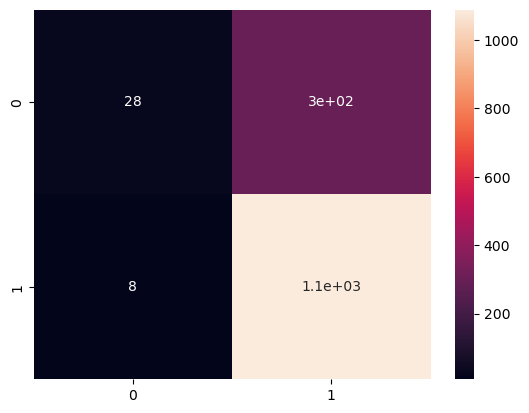

In [65]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [69]:
#### Error Method // Also called as Elbow Method
error = []
for i in range (1,84):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test,predict_i))

In [70]:
print(error)

[0.2661516853932584, 0.3356741573033708, 0.2359550561797753, 0.2682584269662921, 0.2303370786516854, 0.2556179775280899, 0.2401685393258427, 0.2464887640449438, 0.2289325842696629, 0.2331460674157303, 0.2198033707865169, 0.2254213483146067, 0.2198033707865169, 0.2212078651685393, 0.2162921348314607, 0.2176966292134831, 0.2148876404494382, 0.2183988764044944, 0.2085674157303371, 0.2148876404494382, 0.2092696629213483, 0.2092696629213483, 0.2120786516853933, 0.2120786516853933, 0.2120786516853933, 0.2106741573033708, 0.2106741573033708, 0.2106741573033708, 0.2099719101123596, 0.2092696629213483, 0.2106741573033708, 0.2099719101123596, 0.2127808988764045, 0.2120786516853933, 0.2134831460674157, 0.2169943820224719, 0.2127808988764045, 0.2134831460674157, 0.2120786516853933, 0.2148876404494382, 0.2176966292134831, 0.214185393258427, 0.2176966292134831, 0.2183988764044944, 0.2191011235955056, 0.2183988764044944, 0.2183988764044944, 0.2191011235955056, 0.2183988764044944, 0.2176966292134831, 

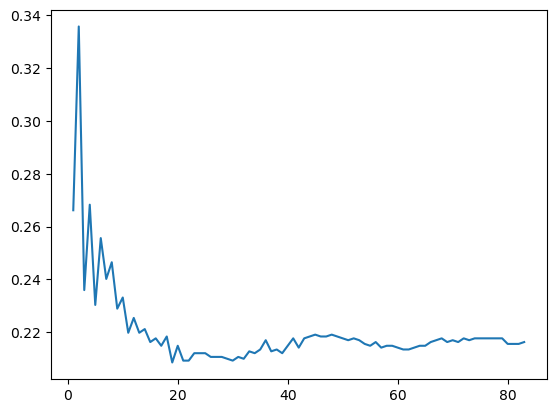

In [71]:
plt.plot(range(1,84),error)